In [27]:
import rasterio as rio 
import pycrs
import os
import geopandas as gpd

In [28]:
import fiona

In [8]:
data_dir = os.path.join(os.getcwd(),"test_data")
raster_file = "1_1988_L5_P1_13aq.tif"
raster_file_masked = "1_1988_L5_P1_13aq_masked.tif"
box_file = "test_box.geojson"
crs = "EPSG:3857"

In [3]:
raster = rio.open(os.path.join(data_dir, raster_file_masked))
type(raster)

rasterio.io.DatasetReader

In [9]:
shoreline = gpd.read_file(os.path.join(data_dir,os.path.splitext(raster_file_masked)[0]+"_shoreline_cleaned.geojson"))
box = gpd.read_file(os.path.join(data_dir,box_file))
box = box.to_crs(crs)
box.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

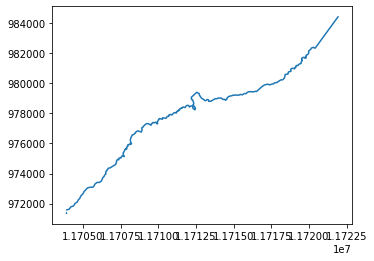

In [21]:
rfsl = gpd.read_file(os.path.join(data_dir,"osm_coastline_epsg4326.geojson"))
rfsl = rfsl.to_crs(crs)
rfsl = gpd.clip(rfsl,box).reset_index(drop=True)
rfsl.to_file(os.path.join(data_dir,"OSM_coastline_clip"),driver="GeoJSON")

rfsl.plot()

In [35]:
wkt = "LINESTRING (11721948.89916676 984437.5874274393, 11721936.83674292 984313.4120447419, 11721922.88371126 984192.9839451724, 11721907.04007179 984076.3031287318, 11721889.3058245 983963.3695954189, 11721869.68096939 983854.1833452345, 11721848.16550646 983748.7443781785, 11721824.75943571 983647.0526942502, 11721799.46275715 983549.108293451, 11721772.27547077 983454.9111757796, 11721743.19757657 983364.4613412365, 11721712.22907455 983277.7587898219, 11721679.36996472 983194.803521535, 11721644.62024707 983115.5955363769, 11721607.9799216 983040.1348343468, 11721569.44898831 982968.4214154452, 11721529.02744722 982900.4552796722, 11721486.71529829 982836.2364270268, 11721442.51254155 982775.7648575099, 11721396.419177 982719.0405711213, 11721348.43520463 982666.0635678609, 11721298.56062444 982616.8338477287, 11721246.79543643 982571.3514107249, 11721193.1396406 982529.6162568494, 11721137.59323696 982491.6283861019, 11721080.1562255 982457.387798483, 11721020.82860622 982426.8944939924, 11720959.61037912 982400.14847263, 11720896.50154421 982377.1497343957, 11720831.50210147 982357.8982792897, 11720764.61205093 982342.3941073122, 11720695.83139256 982330.6372184628, 11720625.16012638 982322.6276127417, 11720552.59825237 982318.3652901489, 11720478.14577056 982317.8502506842, 11720401.80268092 982321.0824943478, 11720323.56898347 982328.0620211399, 11720244.26620545 982337.3631007014, 11720173.39300423 982332.5011622082, 11720113.65879047 982308.774122994, 11720065.06356419 982266.181983059, 11720027.60732538 982204.7247424035, 11720001.29007404 982124.4024010268, 11719986.11181017 982025.2149589292, 11719976.72361368 981915.9841961546, 11719956.05883983 981824.8575114093, 11719922.84312231 981753.9366708233, 11719877.07646114 981703.2216743967, 11719818.7588563 981672.7125221298, 11719747.89030781 981662.4092140223, 11719664.47081566 981672.3117500742, 11719584.03489863 981681.5585256597, 11719526.88397587 981662.8863738326, 11719493.10612298 981616.1770161308, 11719482.70133997 981541.4304525543, 11719487.33954112 981447.5934812251, 11719481.55400186 981362.0182388212, 11719463.57334692 981286.6072431996, 11719433.39757632 981221.3604943599, 11719391.02669005 981166.2779923027, 11719336.4606881 981121.3597370273, 11719269.69957048 981086.6057285342, 11719190.7433372 981062.0159668231, 11719105.88283676 981042.1003129887, 11719024.72411261 981018.4753967129, 11718947.36970599 980991.0517283659, 11718873.8196169 980959.8293079473, 11718804.07384535 980924.8081354578, 11718738.13239133 980885.988210897, 11718675.99525484 980843.3695342649, 11718617.66243589 980796.9521055616, 11718563.13393447 980746.7359247871, 11718512.40975058 980692.7209919413, 11718465.48988422 980634.9073070241, 11718422.3743354 980573.2948700357, 11718383.06310411 980507.8836809762, 11718347.55619036 980438.6737398454, 11718315.85359414 980365.6650466433, 11718287.95531545 980288.8576013702, 11718263.86135429 980208.2514040255)"

In [44]:
lines = []
line = shp.wkt.loads(wkt)
lines.append(line)
line_gdf = gpd.GeoDataFrame(geometry=lines,crs=crs)
line_gdf.to_file(os.path.join(data_dir,"test_smooth_line"),driver="GeoJSON")

In [80]:
rfsl.geometry.iloc[1]
simpler_lines = gpd.read_file(os.path.join(data_dir,"osm_coastline_clip_simplified"))
print(rfsl.geometry.iloc[1].wkt)
print(simpler_lines.geometry.iloc[1].wkt)


MULTILINESTRING ((11703871.70820153 971371.3592958361, 11703907.46530049 971338.7584331419, 11703915.64203006 971318.6836681227), (11703871.70820153 971435.285242394, 11703886.71534741 971420.2789863731, 11703871.70820153 971402.2697984136), (11718263.86135429 980208.2514040255, 11718148.22266725 980223.0856560864, 11718023.6895529 980150.4350413056, 11717873.95370584 980043.6895529488, 11717701.97622451 980015.5192421032, 11717653.05130831 979954.7408191779, 11717524.07654627 979931.0196869639, 11717383.23512652 979883.5774628825, 11717243.874256 979931.0196869639, 11717025.93295692 979870.2301232115, 11716882.13043872 979772.3835530276, 11716515.9338418 979447.7017303362, 11716421.0562398 979453.6375753733, 11716346.92859088 979423.9808855182, 11716268.34816233 979434.3657931332, 11716209.04826958 979409.1581801944, 11716143.81504798 979435.8413062483, 11716037.07078826 979432.8790166144, 11715908.09602623 979394.3354801197, 11715813.20729227 979296.4900224648, 11715712.39636141 9793

In [88]:
import shapely as shp 
from geosmoothing.geosmoothing import GeoSmoothing

simpler_lines = gpd.read_file(os.path.join(data_dir,"osm_coastline_clip_simplified"))

gsm = GeoSmoothing()
smooth_lines = []
for index, row in simpler_lines.iterrows():
    geometry = simpler_lines.geometry.iloc[index]
    if type(geometry) == shp.geometry.linestring.LineString:
        smooth = gsm.smoothWkt(geometry.wkt)
        smooth = shp.wkt.loads(smooth)
        smooth_lines.append(smooth)
    elif type(geometry) == shp.geometry.multilinestring.MultiLineString:
        for line in geometry:
            print(line)
            if line.length > 500:
                smooth = gsm.smoothWkt(line.wkt)
                print(smooth)
                smooth = shp.wkt.loads(smooth)
                smooth_lines.append(smooth)
line_gdf = gpd.GeoDataFrame(geometry=smooth_lines,crs=crs)
line_gdf.to_file(os.path.join(data_dir,"test_smooth_line"),driver="GeoJSON")
print(line_gdf)

[2021-02-18 05:21:26 - INFO] - Smoothing WKT: Start process...
[2021-02-18 05:21:26 - INFO] - Smoothing WKT: finished process...
[2021-02-18 05:21:26 - INFO] - Smoothing WKT: Start process...
[2021-02-18 05:21:26 - INFO] - Smoothing WKT: finished process...
LINESTRING (11703871.70820153 971371.3592958361, 11703915.64203006 971318.6836681227)
LINESTRING (11703871.70820153 971435.285242394, 11703871.70820153 971402.2697984136)
LINESTRING (11718263.86135429 980208.2514040255, 11717025.93295692 979870.2301232115, 11716515.9338418 979447.7017303362, 11714768.00632932 979145.2675973482, 11714452.22632978 978856.1713975307, 11714160.16851374 979013.3172979319, 11713043.80100032 978859.1336463642, 11712545.66854292 979386.9241320509, 11712180.07307125 979053.5274603674, 11712412.24100125 978229.0466351104, 11711908.17521499 978530.0099346016, 11710505.67208244 977662.7175283092, 11710080.18672473 977649.3708962671, 11709911.17034185 977290.5902400624, 11709141.73002149 977265.395179491, 117088

0
1


<AxesSubplot:>

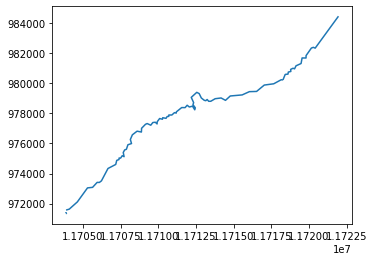

In [26]:
simpler_lines = []
for index, line in rfsl.iterrows():
    print(index)
    simpler = rfsl.geometry.iloc[index].simplify(tolerance=50)
    simpler_lines.append(simpler)
simpler_lines_gdf = gpd.GeoDataFrame(geometry=simpler_lines,crs=rfsl.crs)
simpler_lines_gdf.to_file(os.path.join(data_dir,"osm_coastline_clip_simplified"),driver="GeoJSON")
simpler_lines_gdf.plot()


In [104]:
import shapely as shp

rfsl_clip = gpd.read_file(os.path.join(data_dir,"rfsl_clip.geojson"))
type_MLS = shp.geometry.multilinestring.MultiLineString
type_LS = "shapely.geometry.linestring.LineString"
type_GC = "shapely.geometry.collection.GeometryCollection"

for index, line in rfsl_clip.iterrows():
    line = rfsl_clip.geometry.iloc[index]
    if type(line) == type_MLS:
        a = "all_right"
        print(index)

type(rfsl_clip.geometry.iloc[64])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
65
66
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
219
220
221
222
223
224
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282


shapely.geometry.collection.GeometryCollection